<a href="https://colab.research.google.com/github/ieshita/Project/blob/main/Chronic_kidney_disease_prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from inspect import signature
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv("/content/drive/MyDrive/chronic-kidney-disease-prediction-dataset.csv") 


In [9]:
df.head(10)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
5,90.0,1.015,3.0,0.0,1.0,25.0,1.1,142.00,3.20,12.2,7800.0,4.40,1.0,1
6,70.0,1.010,0.0,0.0,1.0,54.0,24.0,104.00,4.00,12.4,8406.0,4.71,0.0,1
7,76.0,1.015,2.0,4.0,1.0,31.0,1.1,137.53,4.63,12.4,6900.0,5.00,0.0,1
8,100.0,1.015,3.0,0.0,1.0,60.0,1.9,137.53,4.63,10.8,9600.0,4.00,1.0,1
9,90.0,1.020,2.0,0.0,0.0,107.0,7.2,114.00,3.70,9.5,12100.0,3.70,1.0,1


In [10]:
df.shape

(400, 14)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [12]:
df.isnull().sum().sort_values(ascending=False).head()

Bp     0
Sg     0
Al     0
Su     0
Rbc    0
dtype: int64

In [13]:
df=df.drop(['Hemo'], axis = 1)

In [14]:
df['Htn'].fillna(df['Htn'].median(), inplace=True)

In [15]:
new_df = df.dropna()

In [16]:
new_df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,7200.0,5.90,0.0,0


In [17]:
new_df.isnull().sum().sort_values(ascending=False).head()

Bp     0
Sg     0
Al     0
Su     0
Rbc    0
dtype: int64

In [18]:
new_df=new_df.drop(['Bp','Sg','Su'], axis = 1)

In [19]:
new_df

,Al,Rbc,Bu,Sc,Sod,Pot,Wbcc,Rbcc,Htn,Class
0,1.0,1.0,36.0,1.2,137.53,4.63,7800.0,5.20,1.0,1
1,4.0,1.0,18.0,0.8,137.53,4.63,6000.0,4.71,0.0,1
2,2.0,1.0,53.0,1.8,137.53,4.63,7500.0,4.71,0.0,1
3,4.0,1.0,56.0,3.8,111.00,2.50,6700.0,3.90,1.0,1
4,2.0,1.0,26.0,1.4,137.53,4.63,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...
395,0.0,1.0,49.0,0.5,150.00,4.90,6700.0,4.90,0.0,0
396,0.0,1.0,31.0,1.2,141.00,3.50,7800.0,6.20,0.0,0
397,0.0,1.0,26.0,0.6,137.00,4.40,6600.0,5.40,0.0,0
398,0.0,1.0,50.0,1.0,135.00,4.90,7200.0,5.90,0.0,0


In [20]:
x = new_df.drop(['Rbc'], axis = 1)

In [21]:
x

,Al,Bu,Sc,Sod,Pot,Wbcc,Rbcc,Htn,Class
0,1.0,36.0,1.2,137.53,4.63,7800.0,5.20,1.0,1
1,4.0,18.0,0.8,137.53,4.63,6000.0,4.71,0.0,1
2,2.0,53.0,1.8,137.53,4.63,7500.0,4.71,0.0,1
3,4.0,56.0,3.8,111.00,2.50,6700.0,3.90,1.0,1
4,2.0,26.0,1.4,137.53,4.63,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...
395,0.0,49.0,0.5,150.00,4.90,6700.0,4.90,0.0,0
396,0.0,31.0,1.2,141.00,3.50,7800.0,6.20,0.0,0
397,0.0,26.0,0.6,137.00,4.40,6600.0,5.40,0.0,0
398,0.0,50.0,1.0,135.00,4.90,7200.0,5.90,0.0,0


In [22]:
y = new_df['Rbc']

In [23]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    1.0
396    1.0
397    1.0
398    1.0
399    1.0
Name: Rbc, Length: 400, dtype: float64

In [24]:
from sklearn.preprocessing import LabelEncoder
le_x= LabelEncoder()
x.Wbcc = le_x.fit_transform(x.Wbcc)
x.Rbcc = le_x.fit_transform(x.Rbcc)

In [25]:
x

,Al,Bu,Sc,Sod,Pot,Wbcc,Rbcc,Htn,Class
0,1.0,36.0,1.2,137.53,4.63,35,31,1.0,1
1,4.0,18.0,0.8,137.53,4.63,19,26,0.0,1
2,2.0,53.0,1.8,137.53,4.63,33,26,0.0,1
3,4.0,56.0,3.8,111.00,2.50,25,17,1.0,1
4,2.0,26.0,1.4,137.53,4.63,31,24,0.0,1
...,...,...,...,...,...,...,...,...,...
395,0.0,49.0,0.5,150.00,4.90,25,28,0.0,0
396,0.0,31.0,1.2,141.00,3.50,35,41,0.0,0
397,0.0,26.0,0.6,137.00,4.40,24,33,0.0,0
398,0.0,50.0,1.0,135.00,4.90,30,38,0.0,0


In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression()
logmodel.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [29]:
predictions = logmodel.predict(xtest)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

         0.0       0.33      0.06      0.11        16
         1.0       0.87      0.98      0.92       104

    accuracy                           0.86       120
   macro avg       0.60      0.52      0.51       120
weighted avg       0.80      0.86      0.81       120



In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix

In [33]:
print(confusion_matrix(ytest, predictions))

[[  1  15]
 [  2 102]]


In [34]:
logmodel.score(xtest,ytest)

0.8583333333333333

In [35]:
df.corr(method='pearson', min_periods=1)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Wbcc,Rbcc,Htn,Class
Bp,1.000000,-0.164057,0.146060,0.190277,-0.151478,0.184173,0.144469,-0.103383,0.066791,0.025963,-0.220827,0.268003,0.290145
Sg,-0.164057,1.000000,-0.460835,-0.292053,0.253894,-0.249263,-0.176141,0.217456,-0.063450,-0.206880,0.443437,-0.318956,-0.659504
Al,0.146060,-0.460835,1.000000,0.262564,-0.374484,0.405035,0.229396,-0.270709,0.114484,0.200664,-0.454131,0.478309,0.598389
Su,0.190277,-0.292053,0.262564,1.000000,-0.092940,0.126074,0.094568,-0.053448,0.180098,0.159033,-0.163825,0.253179,0.294555
Rbc,-0.151478,0.253894,-0.374484,-0.092940,1.000000,-0.236270,-0.138391,0.140568,0.018164,-0.002205,0.202298,-0.139342,-0.282642
Bu,0.184173,-0.249263,0.405035,0.126074,-0.236270,1.000000,0.581176,-0.307357,0.336954,0.041530,-0.465947,0.387503,0.371982
Sc,0.144469,-0.176141,0.229396,0.094568,-0.138391,0.581176,1.000000,-0.624493,0.205361,-0.005420,-0.323056,0.273904,0.294076
Sod,-0.103383,0.217456,-0.270709,-0.053448,0.140568,-0.307357,-0.624493,1.000000,0.067414,0.006334,0.316883,-0.306501,-0.342268
Pot,0.066791,-0.063450,0.114484,0.180098,0.018164,0.336954,0.205361,0.067414,1.000000,-0.074057,-0.120418,0.057028,0.077063
Wbcc,0.025963,-0.206880,0.200664,0.159033,-0.002205,0.041530,-0.005420,0.006334,-0.074057,1.000000,-0.151380,0.123790,0.205266


In [36]:
x = df.drop(['Class'],axis=1)
y = df['Class']
lab_enc=LabelEncoder()
y=lab_enc.fit_transform(y)

In [37]:
print(x)

       Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot    Wbcc  Rbcc  Htn
0    80.0  1.020  1.0  0.0  1.0  36.0  1.2  137.53  4.63  7800.0  5.20  1.0
1    50.0  1.020  4.0  0.0  1.0  18.0  0.8  137.53  4.63  6000.0  4.71  0.0
2    80.0  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63  7500.0  4.71  0.0
3    70.0  1.005  4.0  0.0  1.0  56.0  3.8  111.00  2.50  6700.0  3.90  1.0
4    80.0  1.010  2.0  0.0  1.0  26.0  1.4  137.53  4.63  7300.0  4.60  0.0
..    ...    ...  ...  ...  ...   ...  ...     ...   ...     ...   ...  ...
395  80.0  1.020  0.0  0.0  1.0  49.0  0.5  150.00  4.90  6700.0  4.90  0.0
396  70.0  1.025  0.0  0.0  1.0  31.0  1.2  141.00  3.50  7800.0  6.20  0.0
397  80.0  1.020  0.0  0.0  1.0  26.0  0.6  137.00  4.40  6600.0  5.40  0.0
398  60.0  1.025  0.0  0.0  1.0  50.0  1.0  135.00  4.90  7200.0  5.90  0.0
399  80.0  1.025  0.0  0.0  1.0  18.0  1.1  141.00  3.50  6800.0  6.10  0.0

[400 rows x 12 columns]


In [38]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [39]:
from sklearn.preprocessing import LabelEncoder
le_x= LabelEncoder()
x.Wbcc = le_x.fit_transform(x.Wbcc)
x.Rbcc = le_x.fit_transform(x.Rbcc)

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [41]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
y_predi=clf.predict(X_test)

In [42]:
print("training dataset:{:.2f}".format(clf.score(X_train,Y_train)))
print("testing dataset:{:.3f}".format(accuracy_score(Y_test, y_predi)))

training dataset:1.00
testing dataset:0.992


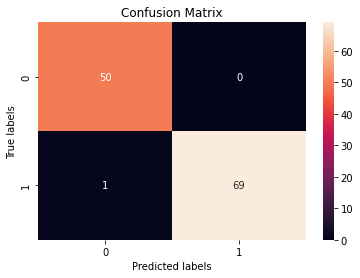

In [43]:
c=pd.DataFrame(
    confusion_matrix(Y_test, y_predi),columns=['Predicted:0', 'Predicted:1'],
    index=['Actual:0', 'Actual:1']
)
ax= plt.subplot()
sns.heatmap(c, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);


In [44]:
newdf = pd.DataFrame({'Actual': Y_test, 'Predicted':y_predi})
newdf

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
115,1,1
116,0,0
117,1,1
118,1,1


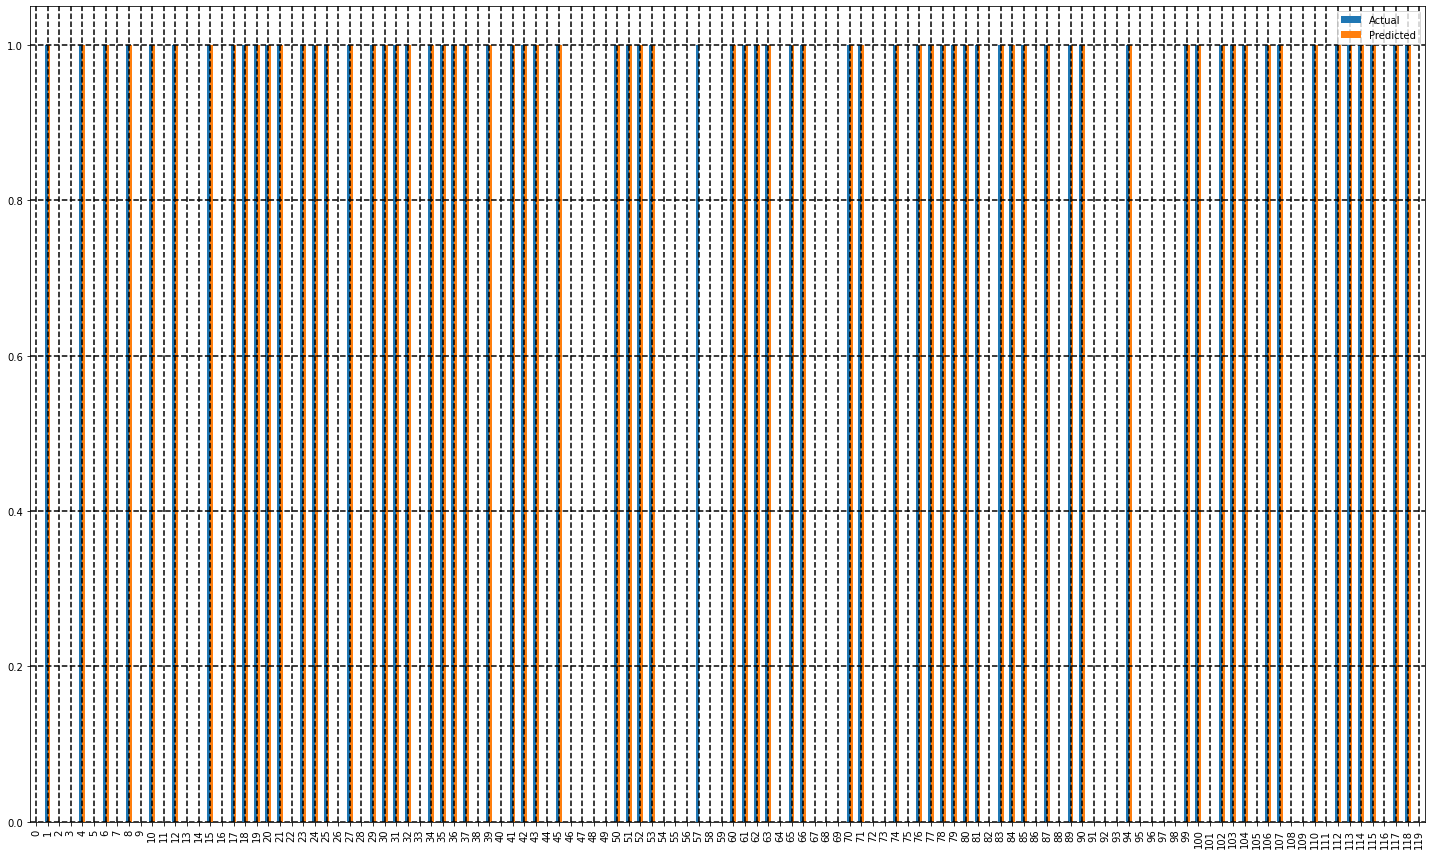

In [45]:
df1 = newdf
df1.plot(kind='bar',figsize=(25,15))
plt.grid(which='major', linestyle='--', linewidth='1.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='pink')
plt.show()

In [46]:
rrc=recall_score(Y_test, y_predi)
print(rrc)

0.9857142857142858


In [47]:
rps=precision_score(Y_test, y_predi)
print(rps)

1.0


In [48]:
rfs=f1_score(Y_test,y_predi)
print(rfs)

0.9928057553956835


Text(0.5, 1.0, '2-class Precision-Recall curve: A=0.99')

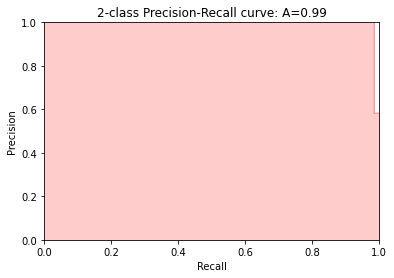

In [49]:
precision, recall, threshold = precision_recall_curve(Y_test, y_predi)
average_precision = average_precision_score(Y_test, y_predi)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: A={0:0.2f}'.format(average_precision))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(280, 12)
(280,)
(120, 12)
(120,)


In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

GaussianNB()

In [53]:
gauss_predicted = gaussian.predict(X_test)

In [54]:
gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

Gaussian Score: 
 51.07
Gaussian Test Score: 
 40.0
Accuracy: 
 0.4
[[33  6]
 [66 15]]
              precision    recall  f1-score   support

           0       0.33      0.85      0.48        39
           1       0.71      0.19      0.29        81

    accuracy                           0.40       120
   macro avg       0.52      0.52      0.39       120
weighted avg       0.59      0.40      0.35       120



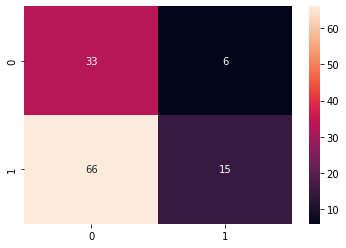

In [55]:
sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

In [56]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [57]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred=dt.predict(X_test)

dt_score = round(dt.score(X_train, y_train) * 100, 2)
dt_test = round(dt.score(X_test, y_test) * 100, 2)

In [59]:
accuracy_score(y_test,y_pred)

0.9583333333333334

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d860f5a50>,
      dtype=object)

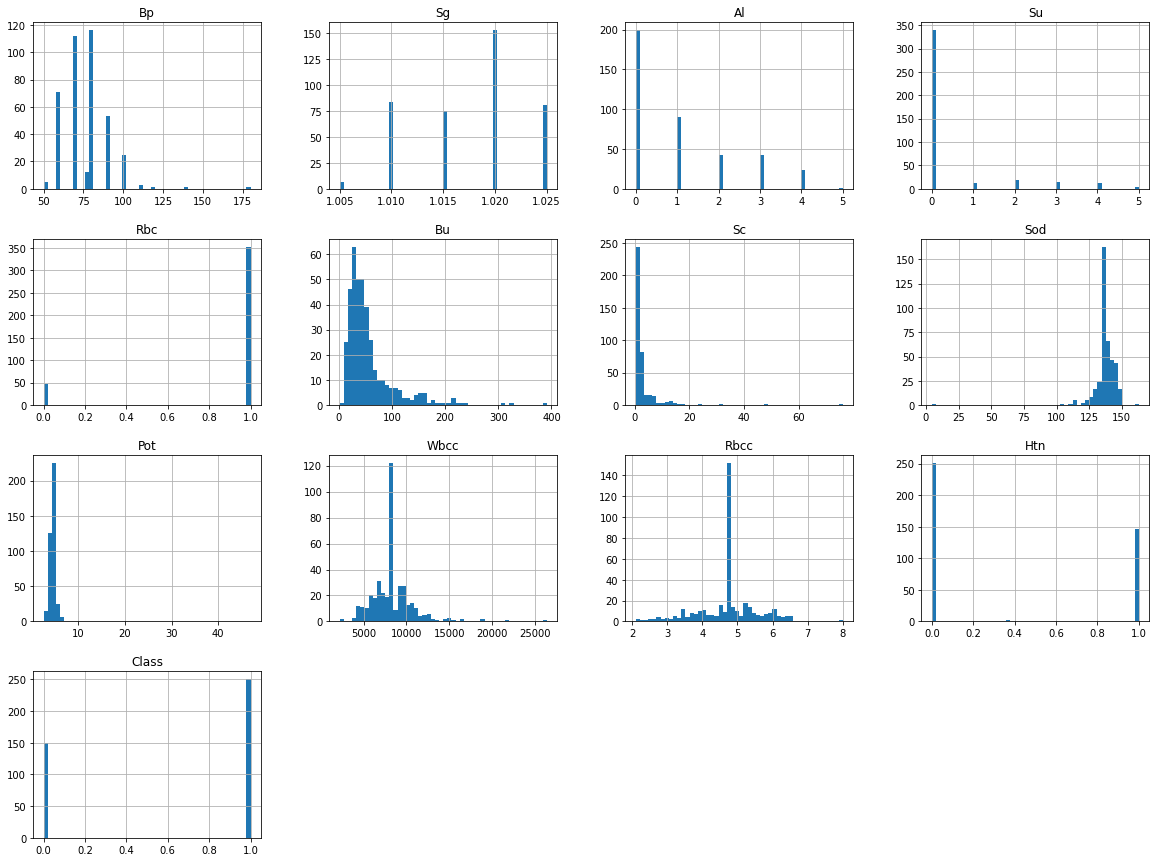

In [60]:
df.hist(bins=50,figsize=(20,15))